In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# making the dataframe out of the CSv
df=pd.read_csv(r"D:\datasets2\HR_comma_sep.csv")
df                                      

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


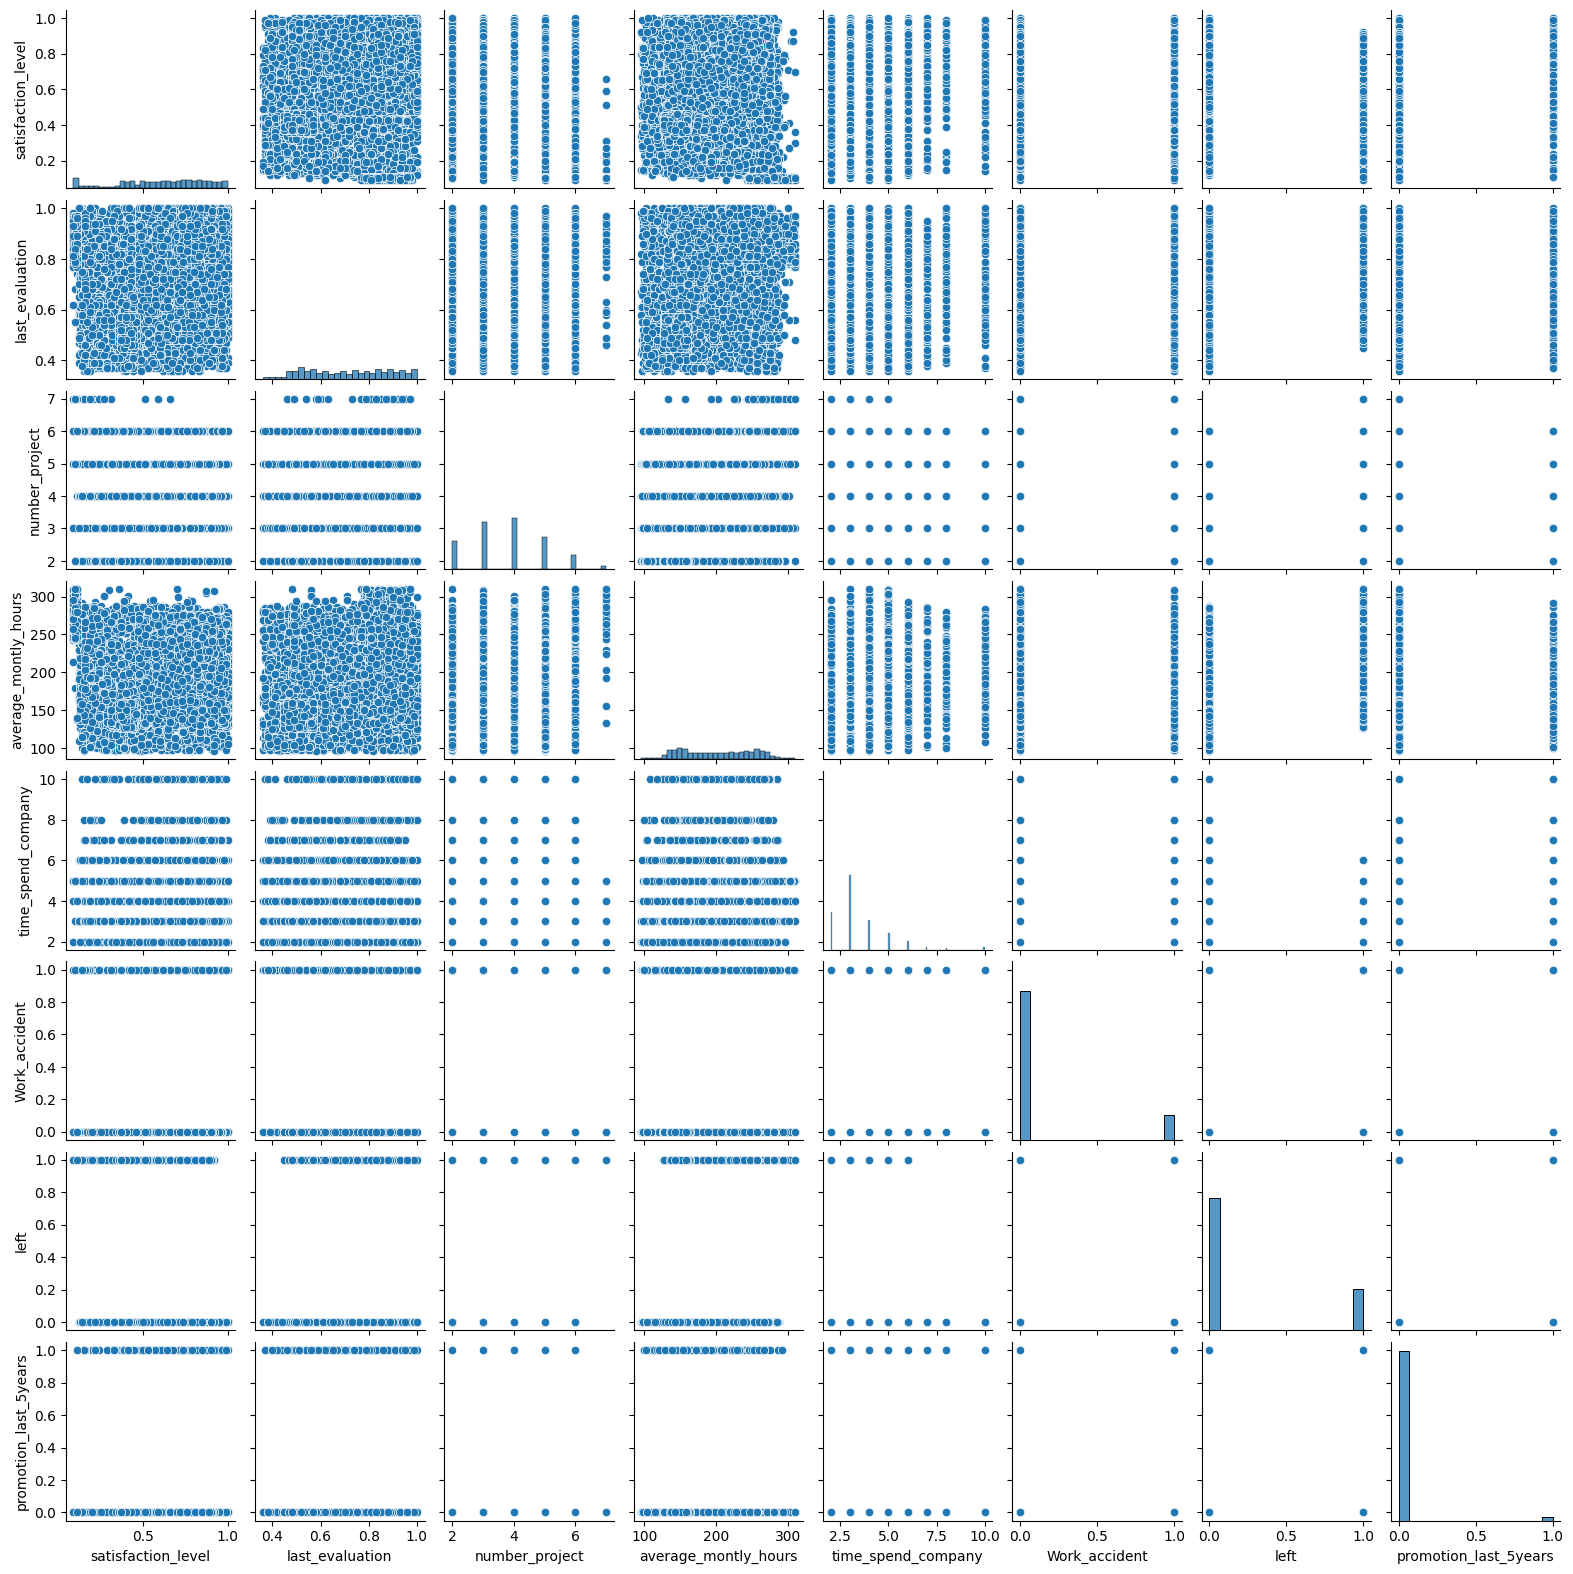

In [2]:
# using pairplot to find the realtionship between different features
import seaborn as sns
sns.pairplot(data=df,kind="scatter",height=2)
plt.show()

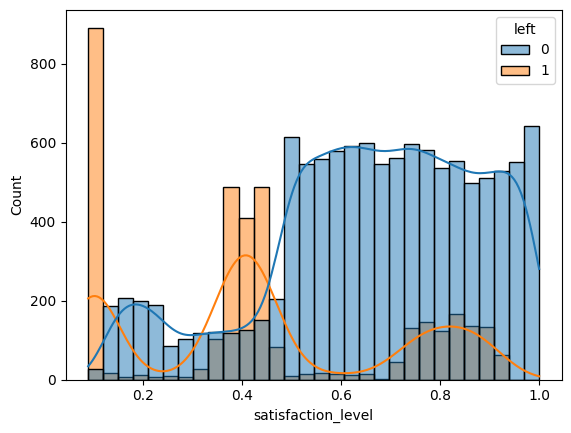

In [3]:
# using histplot to find out the relationship between satisfaction level and left
sns.histplot(x='satisfaction_level',data=df,hue='left',kde=True)
plt.show()

# shows employees having satisfaction level 0.1 and between 0.3 and 0.5 are more likely to live

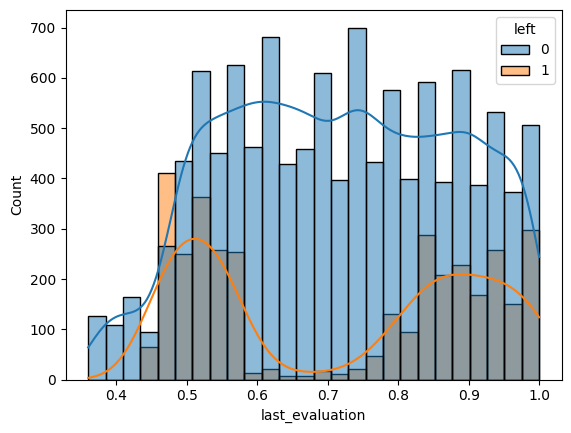

In [4]:
# using histplot to find out the relationship between last evaluation and left
sns.histplot(x='last_evaluation',data=df,hue='left',kde=True)
plt.show()

# employees having evaluation between (0.3 and 0.6) and between (0.8 and to 1) are likely to leave

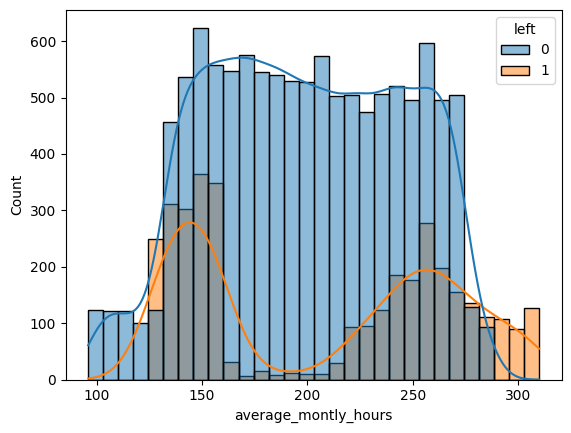

In [5]:
# using histplot to find out the relationship between average monthly hours and left
sns.histplot(x='average_montly_hours',data=df,hue='left',kde=True)
plt.show()

# showing that employees working for(125 to 175) and (225 to 300) are having high chances to leave the company

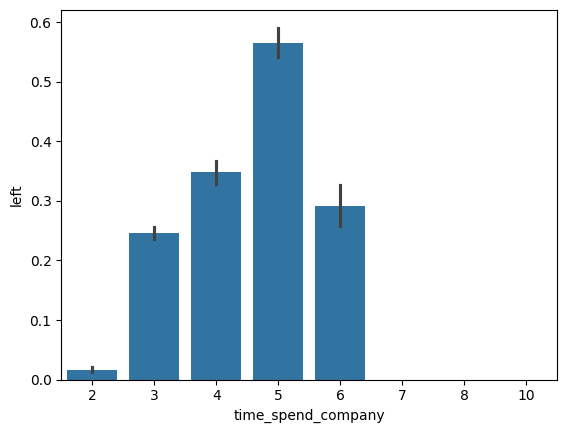

In [6]:
sns.barplot(x='time_spend_company',data=df,y='left')
plt.show()

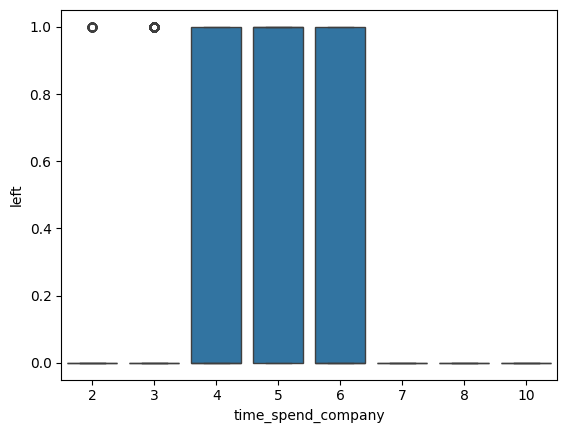

In [7]:
sns.boxplot(x='time_spend_company',data=df,y='left')
plt.show()

# showing people working for 4,5,6 yeare are more likley to leave

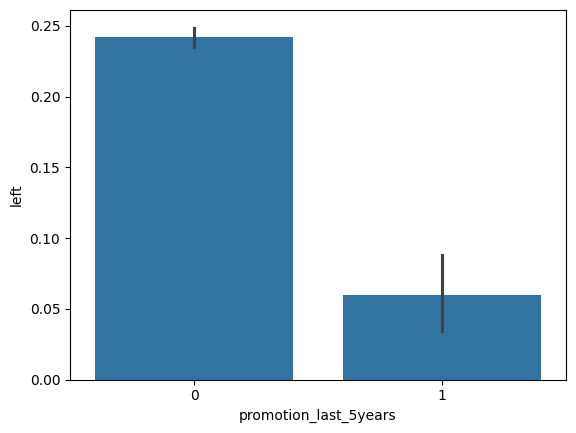

In [8]:
sns.barplot(x='promotion_last_5years',data=df,y='left')
plt.show()

# showing employees that didn't have promotion last 5 years are more likely to leave

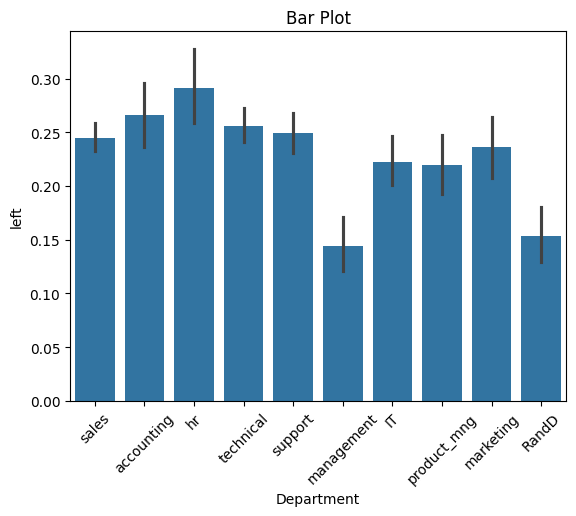

In [9]:
sns.barplot(x='Department',y='left',data=df)
plt.xlabel('Department')
plt.ylabel('left')
plt.title('Bar Plot')
plt.xticks(rotation=45)
plt.show()

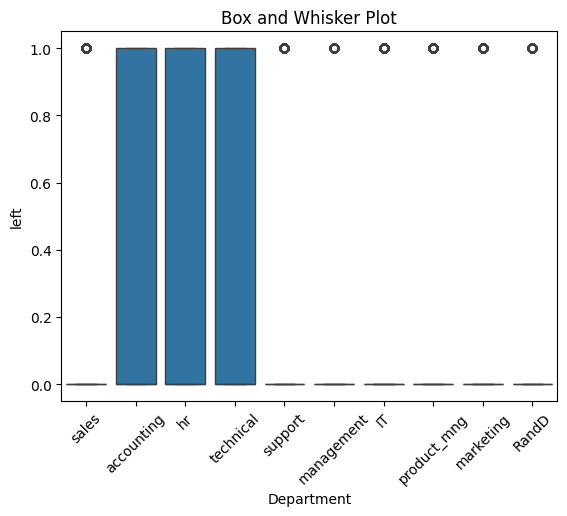

In [10]:
sns.boxplot(x='Department',y='left',data=df)
plt.xlabel('Department')
plt.ylabel('left')
plt.title('Box and Whisker Plot')
plt.xticks(rotation=45)
plt.show()

# showing employees from accounting, Hr, technical department are more likley to leave

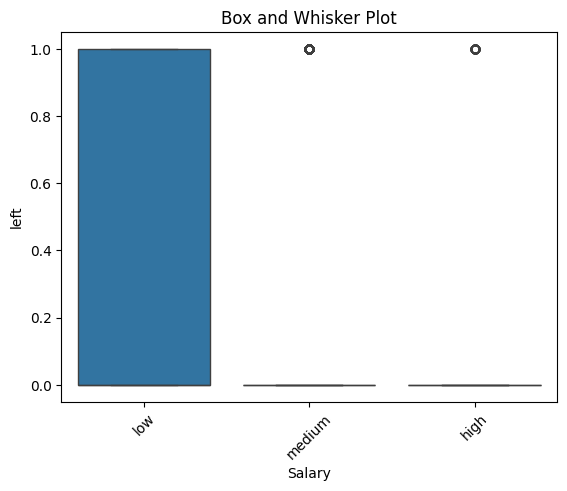

In [11]:
sns.boxplot(x='salary',y='left',data=df)
plt.xlabel('Salary')
plt.ylabel('left')
plt.title('Box and Whisker Plot')
plt.xticks(rotation=45)
plt.show()

# showing employees having low salary department are more likley to leave

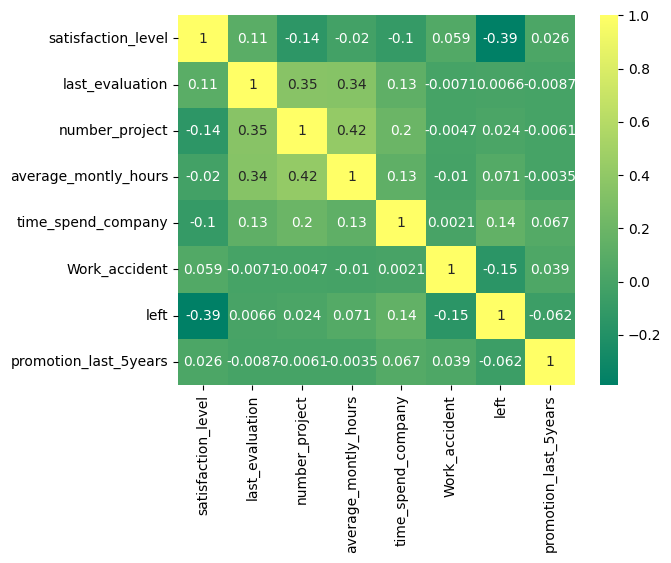

In [12]:
correlation=df.iloc[:,:-2].corr()
sns.heatmap(correlation,annot=True,cmap='summer')
plt.show()

In [13]:
correlating_features_with_left=correlation['left']
print(correlating_features_with_left.sort_values(ascending=True))

satisfaction_level      -0.388375
Work_accident           -0.154622
promotion_last_5years   -0.061788
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
left                     1.000000
Name: left, dtype: float64


In [14]:
encoder1=LabelEncoder()
encoder2=LabelEncoder()
df['salary_encoded']=encoder1.fit_transform(df['salary'])
df['department_encoded']=encoder2.fit_transform(df['Department'])
df=df.drop(['Department','salary'],axis=1)
df

# converting the categorical features to numerical data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encoded,department_encoded
0,0.38,0.53,2,157,3,0,1,0,1,7
1,0.80,0.86,5,262,6,0,1,0,2,7
2,0.11,0.88,7,272,4,0,1,0,2,7
3,0.72,0.87,5,223,5,0,1,0,1,7
4,0.37,0.52,2,159,3,0,1,0,1,7
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,8
14995,0.37,0.48,2,160,3,0,1,0,1,8
14996,0.37,0.53,2,143,3,0,1,0,1,8
14997,0.11,0.96,6,280,4,0,1,0,1,8


In [15]:
x=df[['satisfaction_level','Work_accident','promotion_last_5years','average_montly_hours','time_spend_company','salary_encoded','department_encoded']]
y=df['left']

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=101)

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [18]:
predictions=model.predict(xtest)

In [19]:
print(predictions)

[0 0 0 ... 1 0 0]


In [20]:
from sklearn.metrics import accuracy_score
print("accuracy score: ",accuracy_score(ytest,predictions))

accuracy score:  0.7626666666666667


In [21]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3431
           1       0.50      0.25      0.33      1069

    accuracy                           0.76      4500
   macro avg       0.65      0.59      0.60      4500
weighted avg       0.73      0.76      0.73      4500

